# Observations

In [ ]:
#1 - The Final Tumor Volume (mm3) for Capomulin and Ramicane are similar and comparitively lower than that of Infubinol and 
#    Ceftamin. It would be interesting to see how the other medications rate when compared to eachother.
#2 - Capomulin and Ramicane both have more total measurements conducted as opposed to other medications. Propriva has the least,
#    which was likely caused by discarding the duplicate data
#3 - The final scatter plot provides fairly good correlation for the total population of mice. The correlation could be further 
#    refined by analyzing the gender of mice, as the gender may be related to the weight of the mouse. 

# Import and Clean Data

In [1072]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1073]:
# Checking the number of mice

mouse_count = mouse_study["Mouse ID"].unique()
mouse_count = len(mouse_count)
mouse_count

249

In [1074]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse = mouse_study.duplicated(subset=["Mouse ID","Timepoint"], keep=False)
duplicate_mouse = pd.DataFrame({"Mouse ID": mouse_study["Mouse ID"],
                                "Timepoint": mouse_study["Timepoint"],
                                "Duplicate": duplicate_mouse
                                })
duplicate_mouse = duplicate_mouse.loc[duplicate_mouse["Duplicate"] == True]
duplicate_mouse = duplicate_mouse["Mouse ID"].unique()
duplicate_mouse = duplicate_mouse.item()
duplicate_mouse

'g989'

In [1104]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_study = mouse_study.loc[mouse_study["Mouse ID"] == duplicate_mouse]
duplicate_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1076]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != duplicate_mouse]
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1077]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_count = clean_mouse_study["Mouse ID"].unique()
clean_mouse_count = len(clean_mouse_count)
clean_mouse_count

248

# Summary Statistics

In [1078]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mouse_summary = clean_mouse_study.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = mouse_summary["Tumor Volume (mm3)"].mean()
mouse_median = mouse_summary["Tumor Volume (mm3)"].median()
mouse_var = mouse_summary["Tumor Volume (mm3)"].var()
mouse_std = mouse_summary["Tumor Volume (mm3)"].std()
mouse_sem = mouse_summary["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({
                            "Mean Tumor Volume": mouse_mean,
                            "Median Tumor Volume": mouse_median,
                            "Variance Tumor Volume": mouse_var,
                            "Standard Deviation Tumor Volume": mouse_std,
                            "SEM Tumor Volume": mouse_sem   
                            })
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1079]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

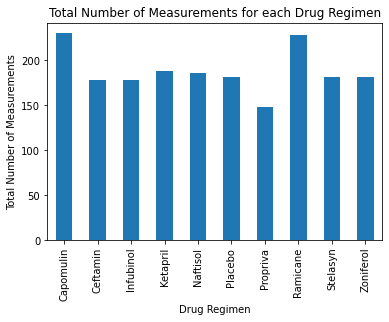

In [1099]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_count = mouse_summary["Tumor Volume (mm3)"].count()
measure_count.plot(kind='bar',
                   title='Total Number of Measurements for each Drug Regimen',
                   xlabel='Drug Regimen',
                   ylabel='Total Number of Measurements')

TypeError: 'tuple' object is not callable

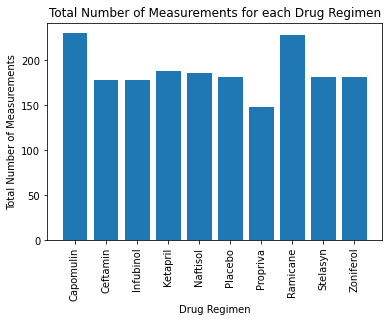

In [1098]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_count.index.unique()
plt.bar(measure_count.index.unique(),measure_count.values)
plt.xticks(rotation='vertical')
plt.title('Total Number of Measurements for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')

<AxesSubplot:>

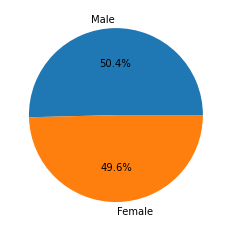

In [1082]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_mouse_study[["Mouse ID","Sex"]]
mouse_gender = mouse_gender.drop_duplicates(subset=['Mouse ID'])
mouse_gender = mouse_gender.value_counts(subset='Sex')
mouse_gender.plot(kind='pie',ylabel="",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x21a60a12fa0>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

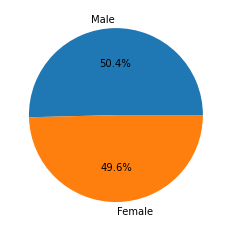

In [1083]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender,labels=('Male','Female'), autopct="%1.1f%%")

# Quartiles, Outliers and Boxplots

In [1084]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint = pd.merge(greatest_timepoint, clean_mouse_study, on=['Mouse ID','Timepoint'])
merge_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [1085]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_vol = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == drug]
    drug_vol = drug_vol["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(drug_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"------------------------------------------------")
    print(f"Quartiles and Outliers of {drug}")
    print(f"------------------------------------------------")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile is: {iqr}")
    print(f"The median is: {median}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

------------------------------------------------
Quartiles and Outliers of Capomulin
------------------------------------------------
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile is: 7.781863460000004
The median is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------
Quartiles and Outliers of Ramicane
------------------------------------------------
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile is: 9.098536719999998
The median is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------
Quartiles and Outliers of Infubinol
------------------------------------------------
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile is: 11.477135160000003
The median is: 60.16518046


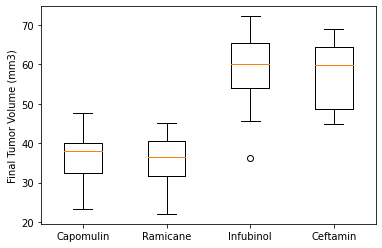

In [1103]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data,labels=drug_regimen)
plt.show()

# Line and Scatter Plots

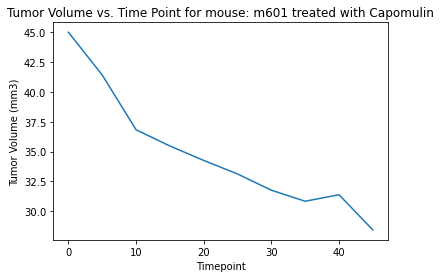

In [1102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
unique_mouse = capomulin_data["Mouse ID"].unique()
random_mouse = random.choice(unique_mouse)
random_capomulin = capomulin_data.loc[capomulin_data["Mouse ID"] == random_mouse]
plt.title(f"Tumor Volume vs. Time Point for mouse: {random_mouse} treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(random_capomulin["Timepoint"],random_capomulin["Tumor Volume (mm3)"])
plt.show()

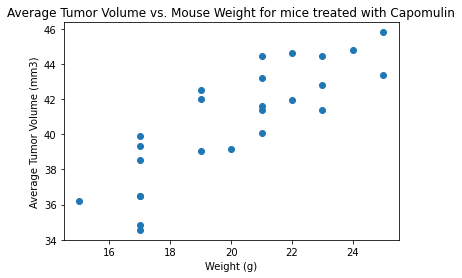

In [1088]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin = capomulin_data.groupby(["Mouse ID"])
average_tumor_vol = mouse_capomulin["Tumor Volume (mm3)"].mean()
average_tumor_vol = pd.DataFrame({"Mouse ID": average_tumor_vol.index,
                                "Average Tumor Volume (mm3)": average_tumor_vol})
average_tumor_vol = average_tumor_vol.set_index('Mouse ID')
mouse_weight = capomulin_data[["Mouse ID","Weight (g)"]]
mouse_weight = mouse_weight.drop_duplicates("Mouse ID")
mouse_weight = mouse_weight.sort_values("Mouse ID")
mouse_weight = mouse_weight.set_index('Mouse ID')
plt.title(f"Average Tumor Volume vs. Mouse Weight for mice treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(mouse_weight,average_tumor_vol)
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


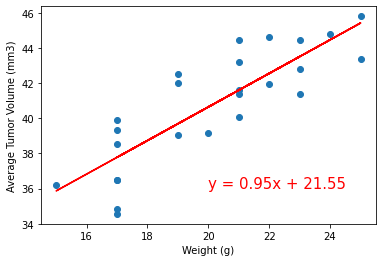

In [1089]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight["Weight (g)"]
y_values = average_tumor_vol["Average Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()